# (a)

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

from astropy.io import ascii
from astropy import units as u
from astropy.io import fits 


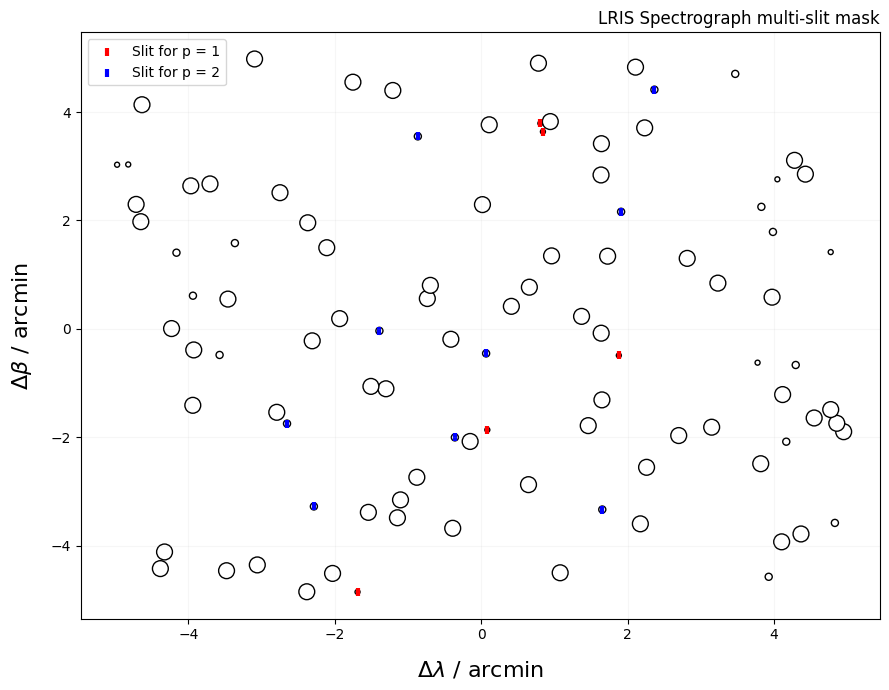

In [2]:
catalogue = ascii.read('hw4_cat.dat')
x, y = catalogue['x'].data * u.arcmin, catalogue['y'].data * u.arcmin 
priority = catalogue['p']

# Mask dimensions
#  You can pick any rotation angle and central location for the mask, but it has to be 3 arcmin (in the spectral direction) by 7 arcmin (in the spatial direction) in size.  
#  You also need at least 15 arcsec empty sky on each side of each object that you fit in the mask.
spectral_direction_size = 3 * u.arcmin
spatial_direction_size = 7 * u.arcmin
empty_sky_size = 15 * u.arcsec

# Sort the catalogue based on priority
#  A priority 1 object is twice as important as a priority 2 object (that is, fitting 2 priority 2 objects is as good as fitting 1 priority 1 object), 
#  and a priority 1 object is 3x more important than a priority 10 object.
priority_order = np.argsort(priority, kind = 'mergesort')
x_sorted = x[priority_order]
y_sorted = y[priority_order]

#priority_order = np.argsort(priority)[::-1]
#x_sorted = x[priority_order]
#y_sorted = y[priority_order]

# Empty arrays
mask_x1 = []
mask_y1 = []

mask_x2 = []
mask_y2 = []

mask_x3 = []
mask_y3 = []

for i in range(len(x_sorted)):

    x_pos = x_sorted[i]
    y_pos = y_sorted[i]

    if (
        (priority[priority_order[i]] == 1) and 
#        (x_pos - empty_sky_size >= -spectral_direction_size / 2) and
#        (x_pos + empty_sky_size <= spectral_direction_size / 2) and
#        (y_pos - empty_sky_size >= -spatial_direction_size / 2) and
#        (y_pos + empty_sky_size <= spatial_direction_size / 2)
        (x_pos - empty_sky_size >= -spectral_direction_size) and
        (x_pos + empty_sky_size <= spectral_direction_size) and
        (y_pos - empty_sky_size >= -spatial_direction_size) and
        (y_pos + empty_sky_size <= spatial_direction_size)

    ):
        mask_x1.append(x_pos.value)
        mask_y1.append(y_pos.value)

    if (
        (priority[priority_order[i]] == 2) and 
        (x_pos - empty_sky_size >= -spectral_direction_size) and
        (x_pos + empty_sky_size <= spectral_direction_size) and
        (y_pos - empty_sky_size >= -spatial_direction_size) and
        (y_pos + empty_sky_size <= spatial_direction_size)

    ):
        mask_x2.append(x_pos.value)
        mask_y2.append(y_pos.value)

    if (
        (priority[priority_order[i]] == 10) and 
        (x_pos - empty_sky_size >= -spectral_direction_size) and
        (x_pos + empty_sky_size <= spectral_direction_size) and
        (y_pos - empty_sky_size >= -spatial_direction_size) and
        (y_pos + empty_sky_size <= spatial_direction_size)

    ):
        mask_x3.append(x_pos.value)
        mask_y3.append(y_pos.value)


fig, ax = plt.subplots(figsize = (9, 7))
ax.grid(alpha = 0.1)
ax.set_title('LRIS Spectrograph multi-slit mask', loc = 'right')
ax.set_xlabel(r'$\Delta\lambda$ / arcmin', fontsize = 16, labelpad = 12)
ax.set_ylabel(r'$\Delta\beta$ / arcmin', fontsize = 16, labelpad = 12)
ax.scatter(x, y, s = priority*13, color = 'white', edgecolors = 'black')
ax.scatter(mask_x1, mask_y1, marker = '|', color = 'red', label = 'Slit for p = 1', lw = 3)
ax.scatter(mask_x2, mask_y2, marker = '|', color = 'blue', label = 'Slit for p = 2', lw = 3)
#ax.scatter(mask_x3, mask_y3, marker = '|', color = 'green', label = 'Slit for p = 10', lw = 3)
ax.legend(loc='upper left')

plt.tight_layout()
plt.savefig('HW04a.pdf')

# Sizes are just the priority

In [3]:
print(mask_x1)
print(mask_x2)
print(mask_x3)

[1.881, 0.8442, 0.08489, -1.688, 0.8094]
[-2.284, -0.3585, 0.06841, 2.367, 1.655, -0.8642, 1.912, -2.651, -1.389]
[-2.307, -2.368, -1.3, -2.747, 2.175, 1.643, 1.728, -2.381, 0.01814, -1.206, -1.101, -1.54, 1.64, 1.372, -1.505, 0.1108, -1.932, 0.659, 1.08, 0.783, -0.4131, -1.143, 1.638, 1.463, -0.1498, 2.26, -0.7347, -2.029, -0.6934, 2.109, 0.945, 0.9621, -1.751, 0.6474, -2.108, -0.8779, 0.413, -0.388, 1.65, 2.699, 2.234]


# (b) 

In [4]:
def measure_noise(bias_image_path):

    with fits.open(bias_image_path) as hdul:
        bias_data = hdul[0].data

    noise_std = np.std(bias_data)
    # or Mean Absolute Deviation (MAD)
    noise_mad = np.mean(np.abs(bias_data - np.mean(bias_data)))

    return noise_std, noise_mad

bias_image_path = 'hw4_bias.fits'
noise_measurement = measure_noise(bias_image_path)

print(f'Noise std: {noise_measurement[0]}')
print(f'Noise MAD : {noise_measurement[1]}')

Noise std: 3.715115547180176
Noise MAD : 2.1713790893554688
